In [1]:
import pandas as pd
data = pd.read_csv("GENDER.csv")

In [2]:
data.shape

(10000, 3)

In [3]:
data.head(10)

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [6]:
data.describe()

,Weight,Height
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


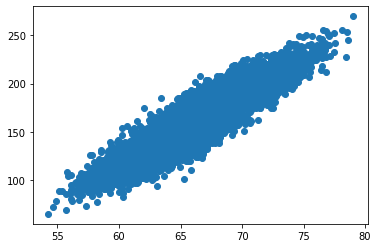

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data['Weight'], data.Height)
plt.show()

In [11]:
data.isnull().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [13]:
x = data.drop('Gender', axis = 1)
y = data.Gender

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                test_size = 0.25,
                                                random_state=10)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 2)
(2500, 2)
(7500,)
(2500,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train, y_train) # model got trained

DecisionTreeClassifier()

In [19]:
predictions = model.predict(x_test)
predictions

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [20]:
model.score(x_train, y_train)

1.0

In [21]:
model.score(x_test, y_test)

0.8832

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(predictions, y_test)

0.8832

In [23]:
print(confusion_matrix(predictions, y_test))

[[1079  143]
 [ 149 1129]]


In [24]:
import pickle

In [25]:
pickle.dump(model, open('finalmodel.pkl', 'wb')) # Storing the model in binary format

In [26]:
loadedmodel = pickle.load(open('finalmodel.pkl', 'rb'))

In [28]:
pred = loadedmodel.predict([[66, 153]]) # giving weight and height 
pred

array(['Female'], dtype=object)

In [34]:
# Creating GUI
from tkinter import *
import joblib
import pickle 
 
def predictGender():
    weight=int(e1.get())
    height=int(e2.get())
    loaded_model=joblib.load(open('finalmodel.pkl','rb'))
    prediction=loaded_model.predict([[weight,height]])
    myText.set(prediction[0])
 
master = Tk()
master.title("Gender Prediction using Height and Weight")
myText=StringVar();
Label(master, text="Enter Weight").grid(row=0, sticky=W)
Label(master, text="Enter Height").grid(row=1, sticky=W)
Label(master, text="The Gender Of a Person is:").grid(row=3, sticky=W)
result=Label(master, text="", textvariable=myText).grid(row=3,column=1, sticky=W)
 
e1 = Entry(master)
e2 = Entry(master)
 
e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
 
b = Button(master, text="Predict Gender", command=predictGender)
b.grid(row=0, column=2,columnspan=2, rowspan=2,sticky=W+E+N+S, padx=5, pady=5)
 
mainloop()

ModuleNotFoundError: No module named 'tkinter'